In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [190]:
hechos = pd.read_csv('./datos modificados/Tabla_de_hechos_final.csv', index_col=False)
hechos['RecaudoxTrafico'] = hechos['Recaudo'] * hechos[ 'Trafico']

evaluated_col = 'Recaudo'

peajes = pd.read_csv('datos originales/peajes.csv', index_col=False)
print('Dimensiones hechos', peajes.shape)
hechos.head()

Dimensiones hechos (90, 20)


,NombreEstacionPeaje,Recaudo,Trafico,Cod_fecha,RecaudoxTrafico
0,ACAPULCO,0.0,0.0,2014_01,0.0
1,ACAPULCO,0.0,0.0,2014_02,0.0
2,ACAPULCO,0.0,0.0,2014_03,0.0
3,ACAPULCO,0.0,0.0,2014_04,0.0
4,ACAPULCO,0.0,0.0,2014_05,0.0


### Crear hechos sin inosistencias con peajes

In [191]:
iterable_peaje = peajes['nombre']

hechos = hechos.loc[hechos['NombreEstacionPeaje'].isin(iterable_peaje)]

print('Dimensiones hechos', peajes.shape)
hechos.tail()

Dimensiones hechos (90, 20)


,NombreEstacionPeaje,Recaudo,Trafico,Cod_fecha,RecaudoxTrafico
9535,ZAMBITO,0.0,0.0,2018_08,0.0
9536,ZAMBITO,0.0,0.0,2018_09,0.0
9537,ZAMBITO,0.0,0.0,2018_10,0.0
9538,ZAMBITO,0.0,0.0,2018_11,0.0
9539,ZAMBITO,0.0,0.0,2018_12,0.0


### Join de hechos con peajes para incluir Departamento

In [192]:
hechos = hechos.join(other=peajes.set_index('nombre'),
            on='NombreEstacionPeaje')[[
    'NombreEstacionPeaje',
    'Trafico',
    'Cod_fecha', 'departamento', evaluated_col]].reset_index(drop=True)

hechos.head()

,NombreEstacionPeaje,Trafico,Cod_fecha,departamento,Recaudo
0,ACAPULCO,0.0,2014_01,Caldas,0.0
1,ACAPULCO,0.0,2014_02,Caldas,0.0
2,ACAPULCO,0.0,2014_03,Caldas,0.0
3,ACAPULCO,0.0,2014_04,Caldas,0.0
4,ACAPULCO,0.0,2014_05,Caldas,0.0


### Remoción de vacíos e inicialización de dict de frecuencias de dígitos en recaudos por dpto

El atributo 'freq' de cda dato del Dict de frecuencias tiene un arreglo de tamaño 9 donde
en la posición i está la información de frecuencias del dígito i+1.

In [193]:
column_name = 'departamento'
# peajes = pd.DataFrame(hechos['NombreEstacionPeaje'].drop_duplicates())
# peajes.to_dict()
filter = hechos[evaluated_col] != ''
hechos = hechos.dropna(subset=[evaluated_col])
# hechos = hechos[filter]

record = pd.DataFrame( hechos.drop_duplicates(subset=[column_name], ignore_index=True)[column_name]).to_dict(orient='records')

frecuenciasAbsolutas = {nombre[column_name]: {'freqs': [0 for i in range(9)], 'total': 0} for nombre in record}
frecuenciasAbsolutas

{'Caldas': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Santander': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Cundinamarca': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Huila': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'La Guajira': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Tolima': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Antioquia': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Bolivar': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Sucre': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Narino': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Meta': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Valle del Cauca': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Risaralda': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Quindio': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Cesar': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Magdalena': {'freqs': [0, 0,

In [194]:
def getFirstDigit(n):
    # n = n if n else 0
    d = int(str(n)[0:1])
    return d

count = 0
for index, row in hechos.iterrows():
    nombre, value = row[column_name], row[evaluated_col]
    # count+=1
    # print(count, recaudo)
    digit = getFirstDigit(value)

    if digit != 0:
        frecuenciasAbsolutas[nombre]['freqs'][digit-1] += 1
        frecuenciasAbsolutas[nombre]['total'] += 1
    # if not count:
    #     break

frecuenciasAbsolutas

{'Caldas': {'freqs': [118, 2, 0, 0, 9, 12, 11, 4, 2], 'total': 158},
 'Santander': {'freqs': [185, 114, 4, 0, 0, 1, 0, 1, 12], 'total': 317},
 'Cundinamarca': {'freqs': [8, 71, 91, 123, 76, 15, 1, 0, 0], 'total': 385},
 'Huila': {'freqs': [45, 0, 1, 0, 0, 0, 6, 15, 13], 'total': 80},
 'La Guajira': {'freqs': [50, 7, 3, 21, 18, 27, 28, 27, 30], 'total': 211},
 'Tolima': {'freqs': [58, 22, 31, 47, 34, 10, 0, 0, 0], 'total': 202},
 'Antioquia': {'freqs': [145, 104, 40, 49, 22, 18, 16, 11, 10], 'total': 415},
 'Bolivar': {'freqs': [258, 26, 1, 1, 0, 0, 8, 27, 23], 'total': 344},
 'Sucre': {'freqs': [48, 43, 5, 17, 3, 10, 4, 3, 14], 'total': 147},
 'Narino': {'freqs': [6, 9, 1, 0, 0, 1, 7, 7, 1], 'total': 32},
 'Meta': {'freqs': [5, 1, 6, 19, 4, 30, 21, 6, 1], 'total': 93},
 'Valle del Cauca': {'freqs': [82, 132, 135, 20, 1, 3, 10, 12, 13],
  'total': 408},
 'Risaralda': {'freqs': [0, 38, 41, 36, 5, 0, 0, 0, 0], 'total': 120},
 'Quindio': {'freqs': [0, 27, 30, 3, 0, 0, 0, 0, 0], 'total': 60

In [195]:
def getFreq(freq, total):
    return freq/total if total != 0 else 0
frecuencias_porcentuales = {key: {
    'freqs':
        [getFreq(freq,
             frecuenciasAbsolutas[key]['total'])
         for freq in frecuenciasAbsolutas[key]['freqs']
         ],
    'total': frecuenciasAbsolutas[key]['total']
}
    for key in frecuenciasAbsolutas.keys()}

frecuencias_porcentuales

{'Caldas': {'freqs': [0.7468354430379747,
   0.012658227848101266,
   0.0,
   0.0,
   0.056962025316455694,
   0.0759493670886076,
   0.06962025316455696,
   0.02531645569620253,
   0.012658227848101266],
  'total': 158},
 'Santander': {'freqs': [0.583596214511041,
   0.35962145110410093,
   0.012618296529968454,
   0.0,
   0.0,
   0.0031545741324921135,
   0.0,
   0.0031545741324921135,
   0.03785488958990536],
  'total': 317},
 'Cundinamarca': {'freqs': [0.02077922077922078,
   0.18441558441558442,
   0.23636363636363636,
   0.3194805194805195,
   0.1974025974025974,
   0.03896103896103896,
   0.0025974025974025974,
   0.0,
   0.0],
  'total': 385},
 'Huila': {'freqs': [0.5625,
   0.0,
   0.0125,
   0.0,
   0.0,
   0.0,
   0.075,
   0.1875,
   0.1625],
  'total': 80},
 'La Guajira': {'freqs': [0.23696682464454977,
   0.03317535545023697,
   0.014218009478672985,
   0.0995260663507109,
   0.08530805687203792,
   0.12796208530805686,
   0.13270142180094788,
   0.12796208530805686,
   0

## Graficar un dato

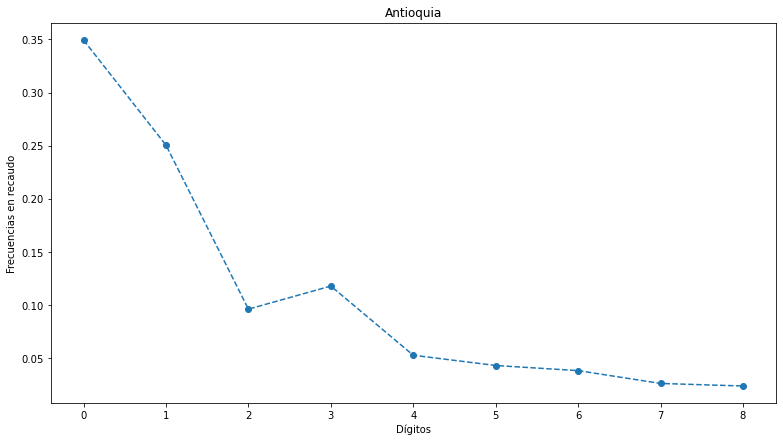

In [197]:
# Colocar aquí la posición en el dict de las frecuencias a graficar
n = 6

datos = list(frecuencias_porcentuales.items())[n][1]['freqs']
name = list(frecuencias_porcentuales.items())[n][0]

plt.rcParams["figure.figsize"] = (13,7)
plt.plot(datos, linestyle='--', marker='o')
plt.title(name)
plt.xlabel('Dígitos')
plt.ylabel('Frecuencias en recaudo')
plt.show()